# Modelo de Kuramoto

Este notebook integra el modelo de Kuramoto para osciladores acoplados

$$ \theta_i = \omega_i + \sum_{j=1}^N K_{ij} \sin(\theta_j - \theta_i) $$

para $K_{ij} = K/N$ y para $\omega_i$ aleatoria con distribución Gaussiana y valor medio nulo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

## Funciones para calcular la evolución temporal

In [2]:
@njit
def evol(theta,omega,K,N,dt):
    # Evoluciona en el tiempo usando Runge-Kutta de segundo orden
    out    = theta
    thetat = out
    suma   = np.zeros(N)
    for i in np.arange(N):
        suma[i] = np.sum(np.sin(out-out[i]))
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D    = dt/ord
        out = thetat + D*( omega + K*suma/N )
    return out

## Integración numérica para acoplamiento pequeño
Para este sistema $K_c = 2/[\pi g(0)] = 2/\pi$. Consideramos un caso con $K<K_c$.

### Parámetros para la simulación

In [3]:
N    = 100    # Número de osciladores
K    = .1     # Amplitud del acoplamiento
step = 20000  # Número de pasos temporales
dt   = 1e-3   # Paso temporal

### Vectores con las coordenadas de fase y de tiempo

In [4]:
theta = 2*np.pi*np.random.rand(int(N)) # Fases iniciales distribuidas en forma uniforme en [0,2*pi)
omega = np.random.randn(int(N))        # Frecuencias distribuidas en forma normal
t     = np.arange(step)*dt             # Tiempo

### Integración numérica

In [5]:
out      = np.zeros((N,step))
out[:,0] = theta
for i in np.arange(step-1): # Evolución temporal
    out[:,i+1] = evol(out[:,i],omega,K,N,dt)

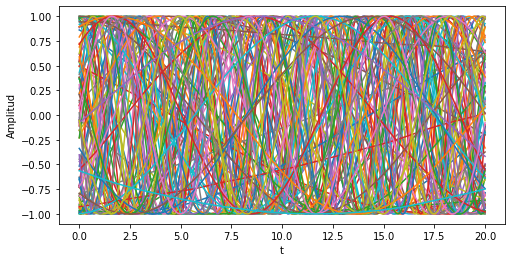

In [6]:
plt.figure(figsize=(8,4))   # Graficamos la evolución temporal de los osciladores
plt.plot(t,np.cos(np.transpose(out)))
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

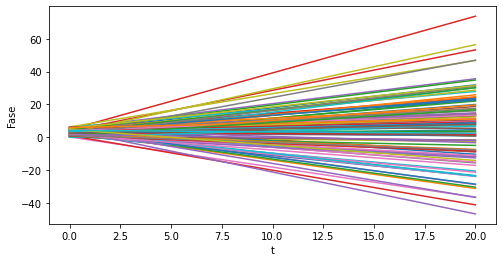

In [7]:
plt.figure(figsize=(8,4))   # Graficamos la evolución temporal de las fases
plt.plot(t,np.transpose(out))
plt.xlabel('t')
plt.ylabel('Fase')
plt.show()

Finalmente calculamos el parámetro de orden

$$ r = \left < \left| \frac{1}{N} \sum_{j=1}^N e^{i \theta_j} \right| \right> $$

donde el valor medio se calcula en el tiempo.

In [8]:
r = np.mean(np.abs(np.mean(np.exp(1j*out[:,int(step/4):]),axis=0)))
print('r =',r)

r = 0.08432881156339772


## Integración numérica para acoplamiento grande
Ahora consideramos un caso con $K>K_c$.

### Parámetros para la simulación

In [9]:
K    = 3.5    # Amplitud del acoplamiento

### Integración numérica

In [10]:
out      = np.zeros((N,step))
out[:,0] = theta
for i in np.arange(step-1): # Evolución temporal
    out[:,i+1] = evol(out[:,i],omega,K,N,dt)

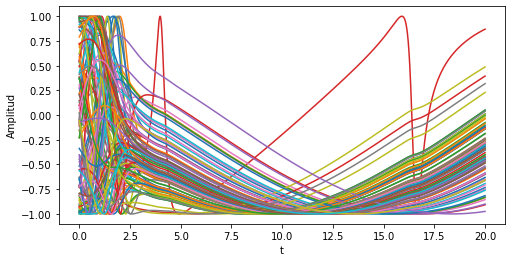

In [11]:
plt.figure(figsize=(8,4))   # Graficamos la evolución temporal de los osciladores
plt.plot(t,np.cos(np.transpose(out)))
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

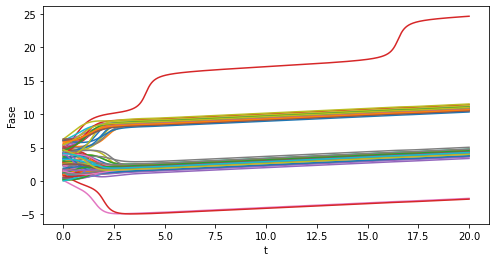

In [12]:
plt.figure(figsize=(8,4))   # Graficamos la evolución temporal de las fases
plt.plot(t,np.transpose(out))
plt.xlabel('t')
plt.ylabel('Fase')
plt.show()

In [13]:
r = np.mean(np.abs(np.mean(np.exp(1j*out[:,int(step/4):]),axis=0)))
print('r =',r)

r = 0.9365248040005923


## Barrido para diferentes valores del acomplamiento
Realizamos un barrido con menos osciladores para estudiar la sincronización en función de $K$.

### Parámetros para las simulaciones

In [14]:
N    = 50     # Número de osciladores
step = 10000  # Número de pasos temporales
dt   = 2e-3   # Paso temporal
Kmax = 4.5    # Máximo valor de K considerado
Knmb = 40     # Número de valores de K considerados para el barrido

### Vectores con las coordenadas de fase y de tiempo

In [15]:
theta  = 2*np.pi*np.random.rand(int(N)) # Fases iniciales distribuidas en forma uniforme en [0,2*pi)
omega  = np.random.randn(int(N))        # Frecuencias distribuidas en forma normal
t      = np.arange(step)*dt             # Tiempo
Ksweep = np.linspace(0,Kmax,Knmb)       # Valores del coeficiente de acoplamiento
rsweep = np.zeros(Knmb)                 # Vector para el parámetro de orden r(K)

### Barrido para diferentes valores de los parámetros

In [16]:
for j in np.arange(Knmb):
    out      = np.zeros((N,step))
    out[:,0] = theta
    for i in np.arange(step-1): # Evolución temporal
        out[:,i+1] = evol(out[:,i],omega,Ksweep[j],N,dt)
    rsweep[j] = np.mean(np.abs(np.mean(np.exp(1j*out[:,int(step/4):]),axis=0)))

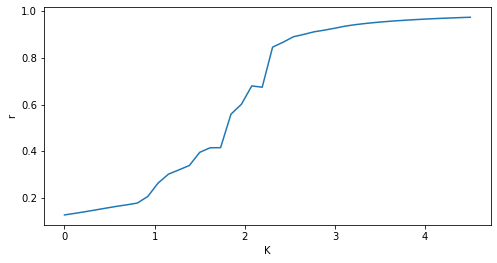

In [17]:
plt.figure(figsize=(8,4))   # Graficamos el parámetro de orden en función de K
plt.plot(Ksweep,rsweep)
plt.xlabel('K')
plt.ylabel('r')
plt.show()